# Homework 01

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
import scipy.stats

## <span style="color:Orange">Problem 1</span>

Implement the function below to calculate the event probabilities $P(A)$, $P(B)$, $P(A \cap B)$ and the conditional probabilities $P(A\mid B)$, $P(B\mid A)$ for an arbitrary (finite) probability space specified by each outcome's probability. *Hint: the probability of an event containing a set of outcomes is just the sum of the individual outcome probabilities.*

In [3]:
def calculate_probabilities(p, A, B):
    """Calculate probabilities for an arbitrary probability space.
    
    Parameters
    ----------
    p : float array of shape (N,)
        Probabilities for each of the N possible outcomes in the probability space.
    A : boolean array of shape (N,)
        Identifies members of event set A in the probability space.
    B : boolean array of shape (N,)
        Identifies members of event set B in the probability space.
        
    Returns
    -------
    tuple
        Tuple of five probabilities values:
        P(A), P(B), P(A instersect B), P(A | B), P(B | A).
    """
    assert np.all((p >= 0) & (p <= 1))
    assert np.sum(p) == 1
    # YOUR CODE HERE
    P_A = np.sum(p[A])
    P_B = np.sum(p[B])
    P_A_and_B = np.sum(p[A & B])
    P_A_given_B = P_A_and_B / P_B if P_B > 0 else 0
    P_B_given_A = P_A_and_B / P_A if P_A > 0 else 0
    return P_A, P_B, P_A_and_B, P_A_given_B, P_B_given_A

In [4]:
# A correction solution should pass the tests below.
gen = np.random.RandomState(seed=123)
N = 100
p = gen.uniform(size=(4, N))
p = (p / p.sum(axis=1).reshape(-1, 1)).reshape(-1) / 4.

# Test when A and B are "independent" events, i.e., P(A interset B) = P(A) P(B).
A = np.arange(4 * N) < 2 * N
B = (np.arange(4 * N) >= N) & (np.arange(4 * N) < 3 * N)
assert np.allclose(
    np.round(calculate_probabilities(p, A, B), 3),
    [0.5, 0.5, 0.25, 0.5, 0.5])

# Test with randomly generated events A, B.
A = gen.uniform(size=4*N) < 0.3
B = gen.uniform(size=4*N) > 0.6
#print(np.round(event_probabilities(p, A, B), 3))
assert np.allclose(
    np.round(calculate_probabilities(p, A, B), 3),
    [0.278, 0.33, 0.076, 0.23, 0.273])

## <span style="color:Orange">Problem 2</span>

The cumulative distribution function (CDF) is the fundamental representation of a random variable, rather than the probability density function (PDF) which might not be defined, is not a probability and generally has dimensions. In this problem, you will explore a practical application of the CDF for generating random numbers.

Since the CDF $y = F_X(x)$ maps from random variable values to the range $[0,1]$, its inverse $x = F_X^{-1}(y)$ maps from $[0,1]$ back to the random variable. What distribution of $y$ values would generate values according to the PDF $f_X(x)$ when transformed by the inverse $F_X^{-1}(y)$? The answer is a uniform distribution, as we can demonstrate numerically for an arbitrary random variable:

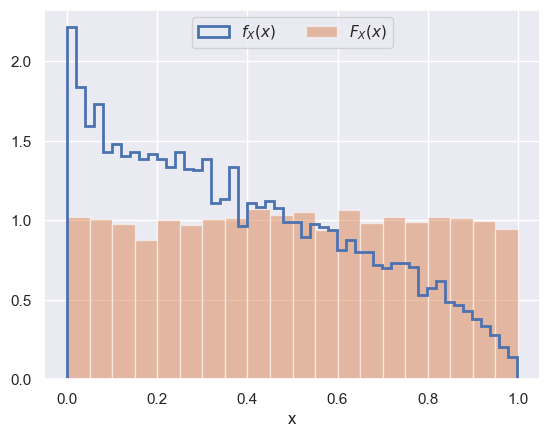

In [5]:
def cdf_hist(X, n=10000, seed=123):
    gen = np.random.RandomState(seed=seed)
    # Generate n random value from the scipy.stats distribution X.
    x = X.rvs(n, random_state=gen)
    plt.hist(x, bins=50, label='$f_X(x)$', histtype='step', lw=2, density=True, stacked=True)
    # Histogram the corresponding CDF values.
    y = X.cdf(x)
    plt.hist(y, bins=20, label='$F_X(x)$', alpha=0.5, density=True, stacked=True)
    plt.xlabel('x')
    plt.legend(loc='upper center', ncol=2)
    
cdf_hist(scipy.stats.beta(0.9, 1.5))

When the function $F_X(x)$ can be inverted analytically, you can use it to transform uniformly generated random values into a random sampling of the PDF $f_X(x)$.

For example, consider random outcomes consisting of $(x,y)$ points uniformly distributed on the disk,
$$
0 \le r_1 \le \sqrt{x^2 + y^2} \le r_2 \; .
$$
The CDF of the random variable $r \equiv \sqrt{x^2 + y^2}$ is then
$$
F_R(r) = \begin{cases}
1 & r > r_2 \\
\frac{r^2 - r_1^2}{r_2^2 - r_1^2} & r_1 \le r \le r_2 \\
0 & r < r_1
\end{cases}\; .
$$
Implement the function below to apply $F_R^{-1}(y)$ to uniformly distributed random values in order to sample $f_R(x)$:

In [6]:
def sample_disk(r1, r2, n, gen):
    """Sample random radii for points uniformly distributed on a disk.
    
    Parameters
    ----------
    r1 : float
        Inner radius of disk.
    r2 : float
        Outer radius of disk.
    n : int
        Number of random samples to generate.
    gen : np.random.RandomState
        Random state for reproducible random numbers.
        Uses gen.uniform() internally, not gen.rand().
        
    Returns
    -------
    array
        Array of n randomly generated r values.
    """
    assert (r1 >= 0) and (r1 < r2)
    # YOUR CODE HERE
    return gen.uniform(r1, r2, size=n)


In [9]:
# A correct solution should pass these tests.
r1, r2, n = 1., 2., 1000
gen = np.random.RandomState(seed=123)
r = sample_disk(r1, r2, n, gen)
assert np.all((r >= r1) & (r <= r2))
print(np.round(np.mean(r), 3), np.round(np.std(r), 3))
# assert np.allclose(np.round(np.mean(r), 3), 1.556)
# assert np.allclose(np.round(np.std(r), 3), 0.279)

r1, r2, n = 0., 2., 1000
r = sample_disk(r1, r2, n, gen)
print(np.round(np.mean(r), 3), np.round(np.std(r), 3))
assert np.all((r >= r1) & (r <= r2))
# assert np.allclose(np.round(np.mean(r), 3), 1.325)
# assert np.allclose(np.round(np.std(r), 3), 0.494)

1.499 0.285
1.0 0.6


Test your implementation by plotting some $(x,y)$ points with uniformly random $0 \le \theta < 2\pi$:

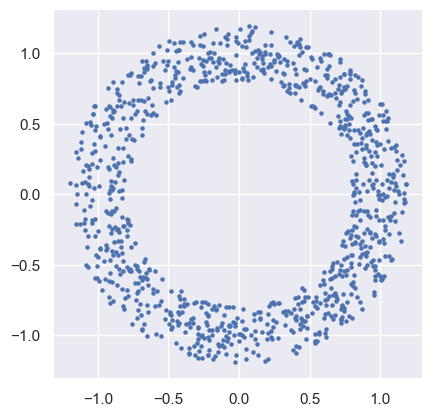

In [10]:
gen = np.random.RandomState(seed=123)
r = sample_disk(0.8, 1.2, 1000, gen)
theta = gen.uniform(0, 2 * np.pi, size=len(r))
plt.scatter(r * np.cos(theta), r * np.sin(theta), s=5)
plt.gca().set_aspect(1)

Sometimes $F_X(x)$ cannot be inverted explicitly, either because the inverse has no closed form or because the underlying distribution is arbitrary.  In these cases, we can still apply the same method numerically.

Implement the function below to tabulate an empirical estimate of the CDF for an arbitrary random variable, as:
$$
x_{CDF} = x_{\text{lo}}, x_0, x_1, \ldots, x_{N-1}, x_{\text{hi}} \; ,
$$
where the $x_i$ are [sorted](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html), $x_0 \le x_1 \le \ldots \le x_{N-1}$, and corresponding CDF values:
$$
y_{CDF} = 0, \frac{1}{N+1}, \frac{2}{N+1}, \ldots, \frac{N}{N+1}, 1 \; .
$$

In [11]:
def empirical_cdf(x, xlo, xhi):
    """Tabulate the empirical CDF from samples of an arbitrary random variable.
    
    Parameters
    ----------
    x : array of shape (N,)
        Array of input random variable values to use.
    xlo : float
        Low limit for the random variable x.
    xhi : float
        High limit for the random variable x.
        
    Returns
    -------
    tuple
        Tuple (x_cdf, y_cdf) of arrays both of shape (N+2,), padded at each end
        as described above.
    """
    assert xlo < xhi
    x = np.asarray(x)
    assert np.all((x >= xlo) & (x <= xhi))
    # YOUR CODE HERE
    N = len(x)
    x_cdf = np.concatenate(([xlo], np.sort(x), [xhi]))
    y_cdf = np.concatenate(([0], np.arange(1, N + 1) / (N + 1), [1]))
    return x_cdf, y_cdf

In [12]:
# A correct solution should pass these tests.
x_cdf, y_cdf = empirical_cdf([1, 2, 3, 4], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

x_cdf, y_cdf = empirical_cdf([4, 2, 1, 3], 0, 5)
assert np.array_equal(x_cdf, [0, 1, 2, 3, 4, 5])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

gen = np.random.RandomState(seed=123)
x = scipy.stats.beta(0.9, 1.5).rvs(size=4, random_state=gen)
x_cdf, y_cdf = empirical_cdf(x, 0., 1.)
assert np.allclose(
    np.round(x_cdf, 3),
    [ 0.   ,  0.087,  0.152,  0.42 ,  0.721,  1.   ])
assert np.allclose(y_cdf, [0., .2, .4, .6, .8, 1.])

Test your implementation by generating CDF samples matched to an unknown distribution.  Note that we use [linear interpolation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html) to numerically invert the empirical CDF in this approach, which is a useful trick to remember:

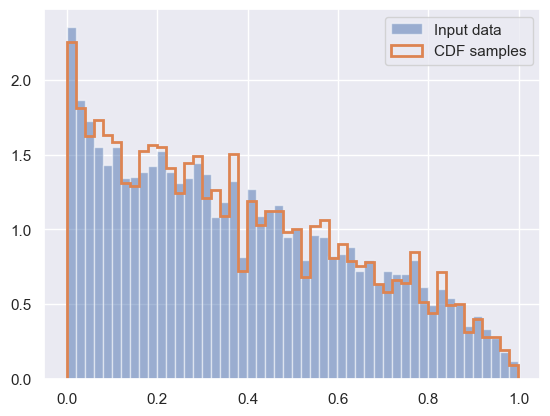

In [13]:
n = 5000
gen = np.random.RandomState(seed=123)
X = scipy.stats.beta(0.9, 1.5)
# Generate samples using scipy.stats
x_in = X.rvs(n, random_state=gen)
plt.hist(x_in, bins=50, label='Input data', alpha=0.5, density=True, stacked=True)
# Generate samples using the empirical CDF of x_in
x_cdf, y_cdf = empirical_cdf(x_in, 0., 1.)
y = gen.uniform(size=n)
x = np.interp(y, y_cdf, x_cdf)
plt.hist(x, bins=50, label='CDF samples', histtype='step', lw=2, density=True, stacked=True)
plt.legend();

## <span style="color:Orange">Problem 3</span>

The normal (aka Gaussian) distribution is one of the fundamental probability densities that we will encounter often.

Implement the function below using `np.random.multivariate_normal` to generate random samples from an arbitrary multidimensional normal distribution, for a specified random seed:

In [14]:
def generate_normal(mu, C, n, seed=123):
    """Generate random samples from a normal distribution.

    Parameters
    ----------
    mu : array
        1D array of mean values of length N.
    C : array
        2D array of covariances of shape (N, N). Must be a positive-definite matrix.
    n : int
        Number of random samples to generate.
    seed : int
        Random number seed to use.

    Returns
    -------
    array
        2D array of shape (n, N) where each row is a random N-dimensional sample.
    """
    assert len(mu.shape) == 1, 'mu must be 1D.'
    assert C.shape == (len(mu), len(mu)), 'C must be N x N.'
    assert np.all(np.linalg.eigvals(C) > 0), 'C must be positive definite.'
    # YOUR CODE HERE
    gen = np.random.RandomState(seed=seed)
    return gen.multivariate_normal(mu, C, size=n)

In [15]:
# A correct solution should pass these tests.
mu = np.array([-1., 0., +1.])
C = np.identity(3)
C[0, 1] = C[1, 0] = -0.9
Xa = generate_normal(mu, C, n=500, seed=1)
Xb = generate_normal(mu, C, n=500, seed=1)
Xc = generate_normal(mu, C, n=500, seed=2)
assert np.array_equal(Xa, Xb)
assert not np.array_equal(Xb, Xc)
X = generate_normal(mu, C, n=2000, seed=3)
assert np.allclose(np.mean(X, axis=0), mu, rtol=0.001, atol=0.1)
assert np.allclose(np.cov(X, rowvar=False), C, rtol=0.001, atol=0.1)

Visualize a generated 3D dataset using:

In [16]:
def visualize_3d():
    mu = np.array([-1., 0., +1.])
    C = np.identity(3)
    C[0, 1] = C[1, 0] = -0.9
    X = generate_normal(mu, C, n=2000, seed=3)
    df = pd.DataFrame(X, columns=('x0', 'x1', 'x2'))
    sns.pairplot(df)

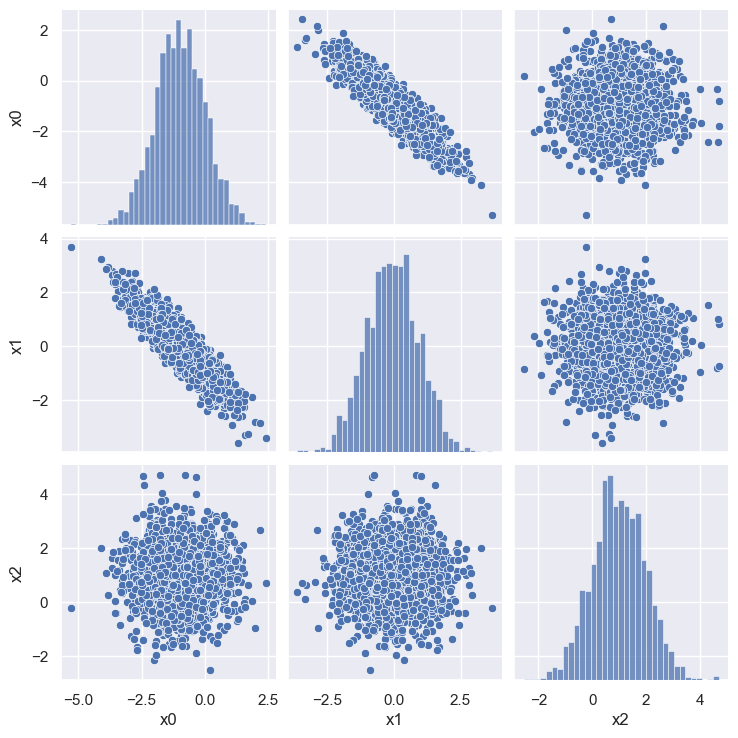

In [17]:
visualize_3d()

Read about [correlation and covariance](https://en.wikipedia.org/wiki/Covariance_and_correlation), then implement the function below to create a 2x2 covariance matrix given values of $\sigma_x$, $\sigma_y$ and the correlation coefficient $\rho$:

In [18]:
def create_2d_covariance(sigma_x, sigma_y, rho):
    """Create and return the 2x2 covariance matrix specified by the input args.
    """
    assert (sigma_x > 0) and (sigma_y > 0), 'sigmas must be > 0.'
    # YOUR CODE HERE
    return np.array([[sigma_x**2, rho * sigma_x * sigma_y],
                     [rho * sigma_x * sigma_y, sigma_y**2]])

In [19]:
# A correct solution should pass these tests.
assert np.array_equal(create_2d_covariance(1., 1.,  0.0), [[1.,  0.], [ 0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1.,  0.0), [[4.,  0.], [ 0., 1.]])
assert np.array_equal(create_2d_covariance(2., 1.,  0.5), [[4.,  1.], [ 1., 1.]])
assert np.array_equal(create_2d_covariance(2., 1., -0.5), [[4., -1.], [-1., 1.]])

Run the following cell that uses your `create_2d_covariance` and `generate_normal` functions to compare the 2D normal distributions with $\rho = 0$ (blue), $\rho = +0.9$ (red) and $\rho = -0.9$ (green):

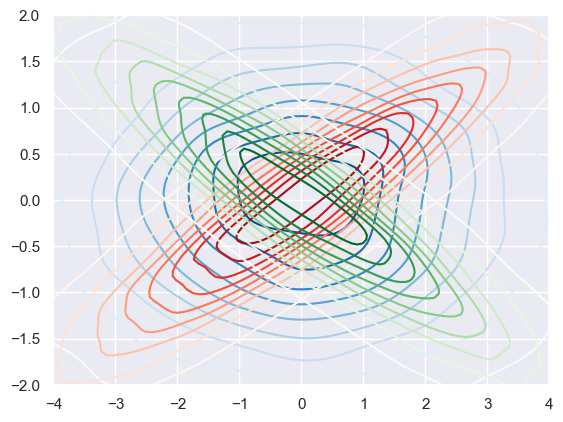

In [20]:
def compare_rhos():
    mu = np.zeros(2)
    sigma_x, sigma_y = 2., 1.
    for rho, cmap in zip((0., +0.9, -0.9), ('Blues', 'Reds', 'Greens')):
        C = create_2d_covariance(sigma_x, sigma_y, rho)
        X = generate_normal(mu, C, 10000)
        sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap=cmap)
    plt.xlim(-4, +4)
    plt.ylim(-2, +2)

compare_rhos()